<a href="https://colab.research.google.com/github/denniesbor/phys513/blob/main/Phys513_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="text-align: center; font-weight: bold;">Dennies Bor</h2>
<h3 style="text-align: center; font-weight: bold;">Applied Electrodynamics Theory</h3>

## Question 1.2

***Redoing/solving integral from HW1***

We considered centered such that half the cylinder above the x-y plane and the other below it.
- At $Z =  0 $ the E field is zero. Moreover, due to symmetry, the force due to surface charges act only along the z axis.
- As $z \to \infty$: Both terms approach zero, so $E_z \to 0$.
- At $z = 0$ (center of the cylinder): The two terms become equal and opposite, so $E_z = 0$.
- As $h \to 0$ (cylinder becomes a ring): The expression approaches that of a charged ring. $E_Z = 0$
- As $R \to 0$ (cylinder becomes a thin line of charge):
The expression approaches that of a finite line charge.
As $h \to \infty$ (infinitely long cylinder):
$E_z \to 0$ for any finite $z$, consistent with an infinite cylinder having only radial field components.

We will consider a ring of charge along the x-y plane with differential heoight of $Z'$

$\therefore $ the differential $dq$ is given by:4
$$dq = σdz'$$
recall:
$$dE_z = dEcos(\theta)$$
where $cos(\theta) = \frac{z-z'}{\sqrt{R^2 + (z-z')^2}}$.

$$dE = \left(\frac{kdq}{R^2 + (z-z')^2}\right)$$
$$dE_z = \left(\frac{kdq}{R^2 + (z-z')^2}\right) * \left(\frac{z-z'}{\sqrt{R^2 + (z-z')^2}}\right)$$

We can further simplify the denominator and intergrate from -h/2 to h/2 to get the cumulative $E$ along the Z axis.
$\therefore$

$$E_z = kσ\int_{-h/2}^{h/2}\frac{(z-z')dz'}{(R^2+(z-z')^2)^{3/2}} $$

***
First, let's make a substitution to simplify the integral:
Let $u = z-z'$, then $du = -dz'$
When $z' = -h/2$, $u = z + h/2$
When $z' = h/2$, $u = z - h/2$
Rewriting the integral with this substitution:
$$E_z = -kσ\int_{z+h/2}^{z-h/2}\frac{u du}{(R^2+u^2)^{3/2}}$$
This integral can be solved directly without further substitution:
$$E_z = -kσ\left[-\frac{1}{\sqrt{R^2+u^2}}\right]_{z+h/2}^{z-h/2}$$
Evaluating the integral:
$$E_z = kσ\left[\frac{1}{\sqrt{R^2+(z-h/2)^2}} - \frac{1}{\sqrt{R^2+(z+h/2)^2}}\right]$$
This can be rewritten as:
$$E_z = kσ\left[\frac{1}{\sqrt{R^2+(z-h/2)^2}} - \frac{1}{\sqrt{R^2+(z+h/2)^2}}\right]$$

This is the final expression for the electric field along the z-axis due to the uniformly charged cylindrical surface.

## Solving Question 2.1
 - **Eqn of point charge**
$$E_z(Z) = \frac{kQ}{z^2} $$

- **Eqn of a ring**
$$E_z(Z) = \frac{kQ_z}{(R^2 + z^2)^\frac{3}{2}} $$

And for the cylinder we shall use that from HW1

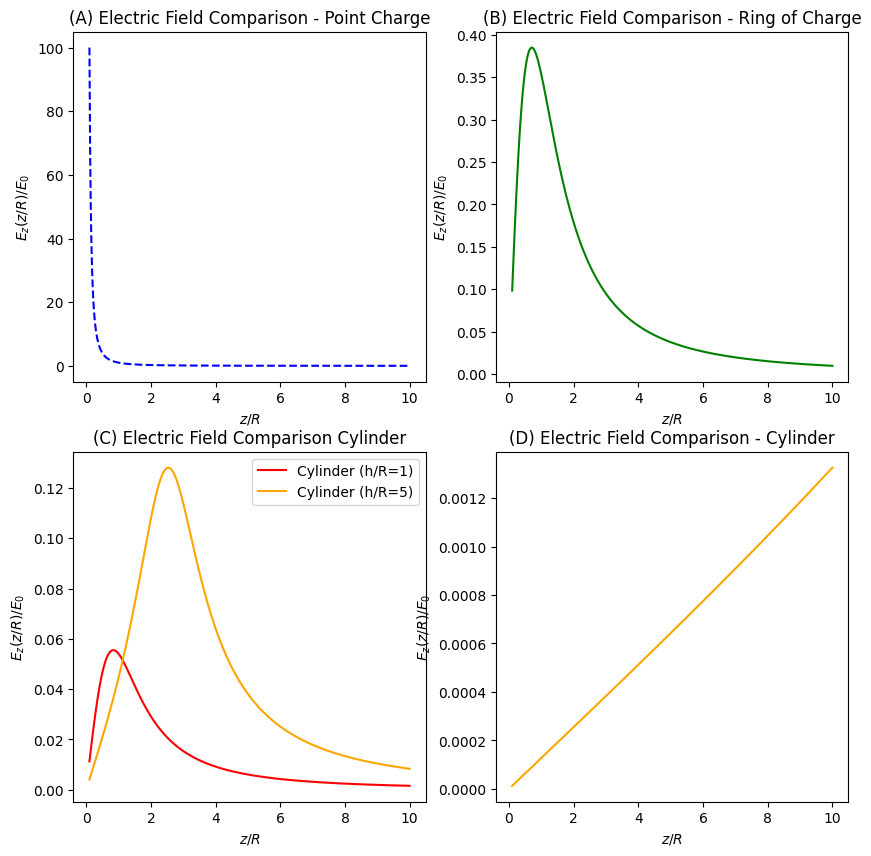

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
epsilon_0 = 8.85e-12  # Permittivity of free space in C^2/(N m^2)
Q = 1.0  # Total charge in C
R = 1.0  # Cylinder radius in meters
sigma = Q / (2 * np.pi * R)  # Surface charge density
k = 1 / (4 * np.pi * epsilon_0)  # Coulomb constant

# Electric field for a point charge at origin
def E_point(z, R):
    return k * Q / z**2

# Electric field for a ring of charge along z-axis
def E_ring(z, R):
    return k * Q * z / (R**2 + z**2)**(3/2)

# Electric field for a uniformly charged cylinder
def E_cylinder(z, R, h):
    term1 = 1 / np.sqrt(R**2 + (z - h/2)**2)
    term2 = 1 / np.sqrt(R**2 + (z + h/2)**2)
    return (sigma * k * (term1 - term2))

# Normalization factor
E_0 = k * Q / R**2

# z/R range for plotting
z_R = np.linspace(0.1, 10, 500)  # Avoid division by zero at z=0

# E field for diff cases
E_point_z = E_point(z_R * R, R) / E_0
E_ring_z = E_ring(z_R * R, R) / E_0

# Cylinder cases with h/R = 1, 5, 100
E_cylinder_1 = E_cylinder(z_R * R, R, h=R) / E_0
E_cylinder_5 = E_cylinder(z_R * R, R, h=5*R) / E_0
E_cylinder_100 = E_cylinder(z_R * R, R, h=100*R) / E_0

# Plotting
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 2, 1)

ax1.plot(z_R, E_point_z, label='Point charge at origin', linestyle='--', color='blue')
ax1.set_xlabel('$z/R$')
ax1.set_ylabel('$E_z(z/R) / E_0$')
ax1.set_title('(A) Electric Field Comparison - Point Charge')

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(z_R, E_ring_z, label='Ring of charge', linestyle='-', color='green')
ax2.set_xlabel('$z/R$')
ax2.set_ylabel('$E_z(z/R) / E_0$')
ax2.set_title('(B) Electric Field Comparison - Ring of Charge')

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(z_R, E_cylinder_1, label='Cylinder (h/R=1)', linestyle='-', color='red')
ax3.plot(z_R, E_cylinder_5, label='Cylinder (h/R=5)', linestyle='-', color='orange')
ax3.set_xlabel('$z/R$')
ax3.set_ylabel('$E_z(z/R) / E_0$')
ax3.set_title('(C) Electric Field Comparison Cylinder')
ax3.legend(loc="best")


ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(z_R, E_cylinder_100, label='Cylinder (h/R=100)', linestyle='-', color='orange')
ax4.set_xlabel('$z/R$')
ax4.set_ylabel('$E_z(z/R) / E_0$')
ax4.set_title('(D) Electric Field Comparison - Cylinder')

plt.show()


## Question 2.2

1. **Gauss Law**
The flux $\Phi_E$ is given by:
$$\Phi_E = \frac{\mathbf{Q}}{\epsilon_0} $$
Since the cube has six faces:
$$\Phi_E = \frac{\mathbf{Q}}{6\epsilon_0} $$
- **Coulomb's Law**
$$ \mathbf{E} = \frac{1}{4 \pi \epsilon_0} \frac{Q}{r^2} \hat{r} $$

- **Electric Field Component in the $\hat{z}$ Direction**
$$ E_z = \frac{1}{4 \pi \epsilon_0} \frac{Q \cdot a}{(x^2 + y^2 + a^2)^{3/2}} $$

- **Differential Flux**
$$ d\Phi_E = E_z \, dA = \frac{1}{4 \pi \epsilon_0} \frac{Q \cdot a}{(x^2 + y^2 + a^2)^{3/2}} \, dx \, dy $$

- **Convert to Polar Coordinates**
$$ x^2 + y^2 = r^2 $$
$$ dx \, dy = r \, dr \, d\theta $$

- **Polar integral**
$$2\pi$$

- **Radial Integral**
$$ \int_0^{a\sqrt{2}} \frac{rdr}{(r^2 + a^2)^{3/2}} = \frac{\sqrt{3} - 1}{a\sqrt{3}} $$

- **Total Flux through One Face**
$$ \Phi_E = \frac{Q (\sqrt{3} - 1)}{2 \epsilon_0 \sqrt{3}} $$


In [24]:
# Comparing the Q/\epsilon_o with the integral version
# Dummy Vars

Q = 1
epsilon_0 = 8.85e-12

phi_1 = Q / (6 * epsilon_0)
phi_2 = Q * (np.sqrt(3) - 1) / (2 * epsilon_0 * np.sqrt(3))

print(f"Phi_1: {phi_1}")
print(f"Phi_2: {phi_2}")

# Compare the error difference as percentage
error = (phi_1 - phi_2) / phi_1 * 100
print(f"Error: {error}%")

Phi_1: 18832391713.747646
Phi_2: 23878515864.992893
Error: -26.794919243112258%


## Question 2.3

2.3.1. For a spherical shell, the E-field inside must be zero.
According to Gauss's law:
$$\Phi_E = \frac{q_{enc}}{\epsilon_0}$$
if $\mathbf{E}$ is zero, then $q_{enc}$ is zero.

2.3.2. For a spherical shell of radius $b$, the enclosed charge on the inner surface is zero.
The E-field is due to the charge on the inner shell. So:
$$Q_{inner_surface_b} + Q_{inner_shell} = 0$$
But $Q_{inner_shell}$ is $-Q$, so:
$$Q_{inner_surface_b} = +Q$$

2.3.3.The total charge on the outer shell is $+Q$, but from point 2, we know the inner surface has $+Q$. Thus, the charge on the outer surface must be zero.

2.3.4.
Electric field in each region:

- Region 1 (r < a - t): E = 0 (inside a conductor)
- Region 2 (a - t < r < a): E = 0 (inside a conductor)
- Region 3 (a < r < b): E = kQ/r² (pointing outward)
- Region 4 (b < r < b + t): E = 0 (inside a conductor)
- Region 5 (r > b + t): E = 0 (total charge resides inside the inner surface of the shell)

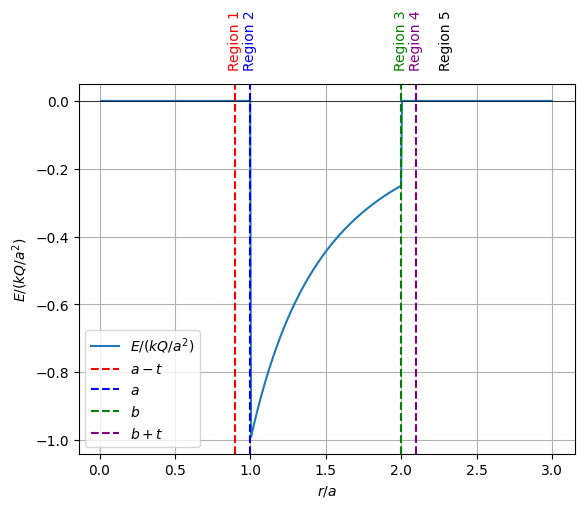

In [4]:
# Sketch of the graph
# Will use some dummy variables
Q = -1      # Charge
a = 1      # Outer radius
t = 0.1    # Thickness
b = 2      # Inner radius
k = 1      # Coulomb constant

# Define r/a range
r_a = np.linspace(0.01, 3, 500)  # Range of r/a (avoid r=0 to prevent division by zero)

# Initialize E/kQ/a^2 array
E_kQ_a2 = np.zeros_like(r_a)

# Region 1: r < a - t (inside the inner conductor, E = 0)
E_kQ_a2[r_a < a - t] = 0

# Region 2: a - t <= r < a (inside the inner conductor, E = 0)
E_kQ_a2[(r_a >= a - t) & (r_a < a)] = 0

# Region 3: a <= r < b (between the conductors, E = kQ / r^2)
E_kQ_a2[(r_a >= a) & (r_a < b)] = (k * Q) / r_a[(r_a >= a) & (r_a < b)]**2

# Region 4: b <= r < b + t (inside the outer conductor, E = 0)
E_kQ_a2[(r_a >= b) & (r_a < b + t)] = 0

# Region 5: r >= b + t (outside the outer conductor, E = 0)
E_kQ_a2[r_a >= b + t] = 0

# Plot
plt.plot(r_a, E_kQ_a2, label=r'$E/(kQ/a^2)$')

# Add vertical lines to indicate regions
plt.axvline(x=a - t, color='red', linestyle='--', label=r'$a - t$')
plt.axvline(x=a, color='blue', linestyle='--', label=r'$a$')
plt.axvline(x=b, color='green', linestyle='--', label=r'$b$')
plt.axvline(x=b + t, color='purple', linestyle='--', label=r'$b + t$')

# Add region labels
plt.text(a - t, 0.1, 'Region 1', horizontalalignment='center', color='red', rotation=90)
plt.text(a, 0.1, 'Region 2', horizontalalignment='center', color='blue', rotation=90)
plt.text(b, 0.1, 'Region 3', horizontalalignment='center', color='green', rotation=90)
plt.text(b + t, 0.1, 'Region 4', horizontalalignment='center', color='purple', rotation=90)
plt.text(b + t + 0.2, 0.1, 'Region 5', horizontalalignment='center', color='black', rotation=90)

# Labels and title
plt.xlabel(r'$r/a$')
plt.ylabel(r'$E/(kQ/a^2)$')
# plt.title('Electric Field vs $r/a$ with Region Labels')
plt.axhline(0, color='black', linewidth=0.5)
plt.grid(True)

# Show the plot
plt.legend()
plt.show()



## Question 2.3.4

$$ $\psi(b) - \psi(a) = -\int_a^b\mathbf{E}⋅ dl$$

but from coulombs law
$$\mathbf{E} = \frac{kQ}{r^2}r̂ $$

since we are taking a radial route differential length ($dl$) becomes ($dr$)

$$ $\psi(b) - \psi(a) = -\int_a^b\frac{kQ}{r^2}r̂ ⋅ dr$$

Solving the integral becomes
$$
\int_a^b \frac{1}{r^2} dr = -\frac{1}{b} + \frac{1}{a}
$$

And the electric potential difference is
$$
\psi(b) - \psi(a) = kQ \left( \frac{1}{b} - \frac{1}{a} \right)
$$

and given $a$ is zero, then electric potential difference is
$$\psi = \frac{kQ}{b}$$

(0.0, 10.45)

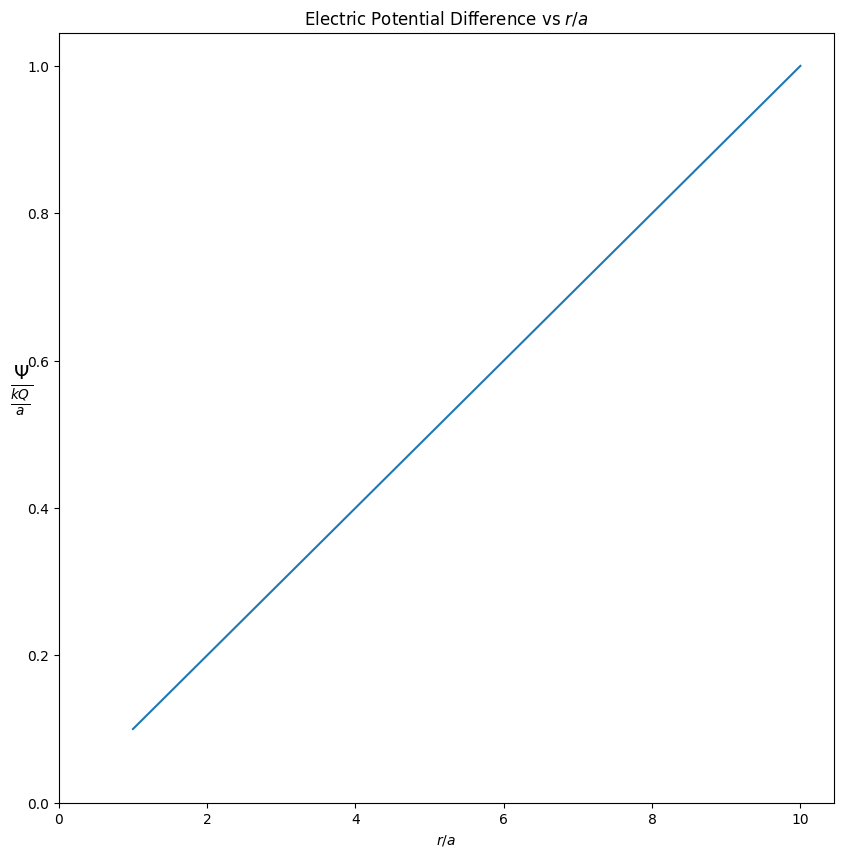

In [23]:
# Sketch of \psi / (KQ/a) versus r/a
# Will use some dummy variables
Q = -10      # Charge (C)
a = 5      # Outer radius
b = 50      # Inner radius
k = 1      # Coulomb constant

# r range from a to b
r = np.linspace(a, b, 500)

def kq_a(r):
    return k * Q / r

# \psi
psi = kq_a(b)

# Initialize \psi / (KQ/a) array
psi_kQ_a = psi / kq_a(r)

# r / a
r_a = r / a

# Plot
fig = plt.figure(figsize=(10, 10))

plt.plot(r_a, psi_kQ_a, label=r'$\psi/(KQ/a)$')
plt.xlabel(r'$r/a$')
plt.ylabel(r'$\frac{\Psi}{\frac{kQ}{a}}$', fontsize=20, rotation=0)
plt.title('Electric Potential Difference vs $r/a$')

plt.ylim(bottom=0)
plt.xlim(left=0)